In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("D:\\Data Science\\Datasets\\diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Dropping the first column

In [3]:
df = df.drop(df.columns[0], axis = 'columns')
df.shape
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.cut.value_counts() 
# df.groupby('cut')['cut'].agg('count')

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [6]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Handling NA and 0 Values

In [7]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.shape

(53940, 10)

Removing 0 values in x,y and z

In [9]:
df[(df.x == 0)]

df = df[df['x'] != 0]
df = df[df.y != 0]
df = df[df.z != 0]

df[(df.z==0)]

df.shape

(53920, 10)

Checking Outliers(Using Line Plot to Visualize Outliers)

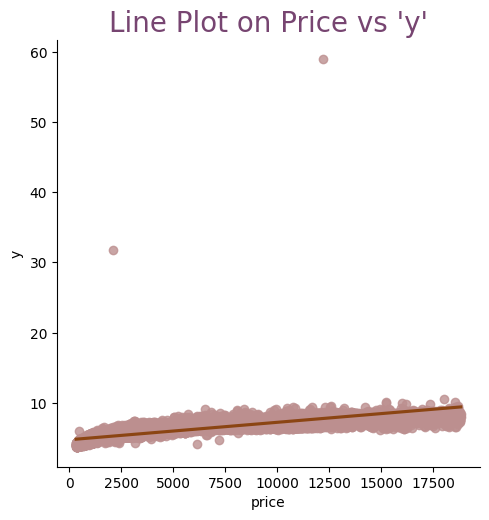

In [10]:
lm = sns.lmplot(x="price", y="y", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

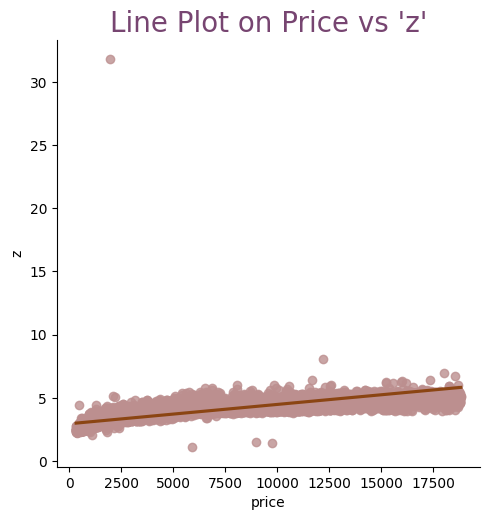

In [11]:
lm = sns.lmplot(x="price", y="z", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

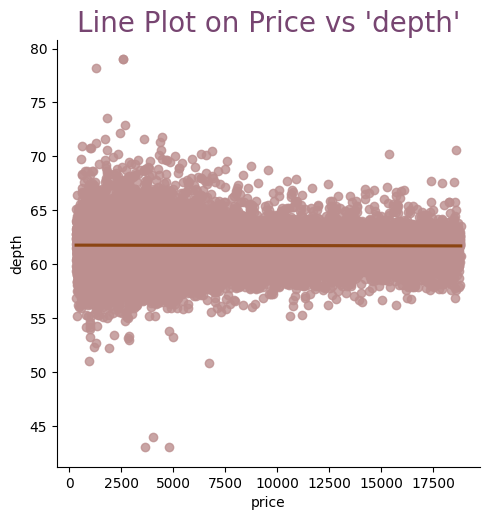

In [12]:
lm = sns.lmplot(x="price", y="depth", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

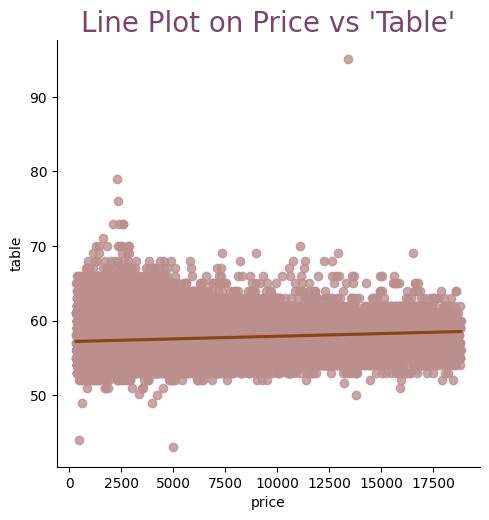

In [13]:
lm = sns.lmplot(x="price", y="table", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [14]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Removing Outliers using IQR

In [15]:
df1 = df 
columns = ('x', 'y', 'z', 'depth', 'table')

for i in columns:
    q1, q3 = np.percentile(df1[i], [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    df1 = df1[(df1[i] <= upper_fence) & (df1[i] >= lower_fence)]

df1.describe()    


,carat,depth,table,price,x,y,z
count,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000,50967.000000
mean,0.785564,61.782775,57.298144,3892.909510,5.701186,5.705099,3.523311
std,0.466366,1.111112,2.023969,3980.143732,1.114195,1.107275,0.687961
min,0.200000,58.800000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,0.390000,61.100000,56.000000,928.000000,4.690000,4.700000,2.890000
50%,0.700000,61.900000,57.000000,2346.000000,5.670000,5.680000,3.510000
75%,1.040000,62.500000,59.000000,5305.000000,6.530000,6.520000,4.030000
max,3.050000,64.700000,63.500000,18823.000000,9.260000,9.250000,5.690000


Cheking any left Outliers

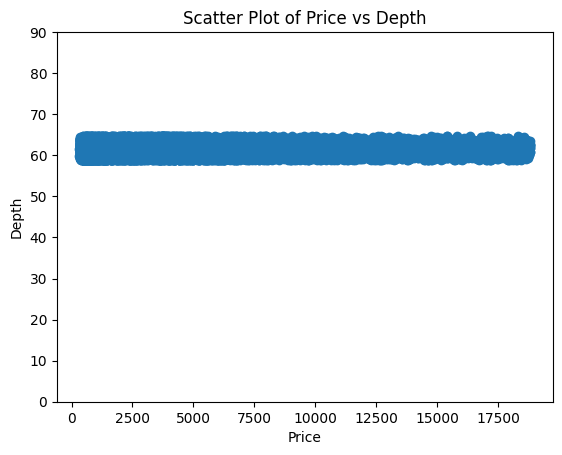

In [16]:
plt.scatter(df1['price'], df1['depth'])
plt.title('Scatter Plot of Price vs Depth')
plt.xlabel('Price')
plt.ylabel('Depth')

plt.ylim(0,90)
plt.show()


Text(0, 0.5, 'Count')

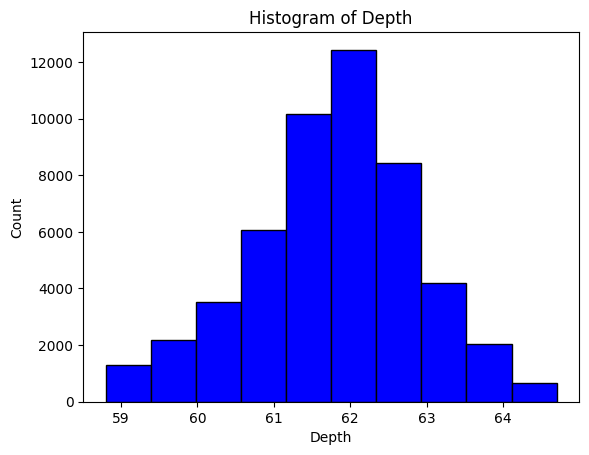

In [17]:
plt.hist(df1['depth'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Depth')
plt.xlabel('Depth')
plt.ylabel('Count')

In [18]:
df.shape

(53920, 10)

In [19]:
df1.shape

(50967, 10)

Label Encoding (order among Data)

In [20]:
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

df1['le_cut'] = le_cut.fit_transform(df1['cut'])
df1['le_color'] = le_color.fit_transform(df1.color)
df1['le_clarity'] = le_clarity.fit_transform(df1.clarity)

# Display the mapping between original values and encoded integers
mapping = dict(zip(le_cut.classes_, le_cut.transform(le_cut.classes_)))
print("Mapping between original values and encoded integers:")
print(mapping)

df1.head()

Mapping between original values and encoded integers:
{'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}


,carat,cut,color,clarity,depth,table,price,x,y,z,le_cut,le_color,le_clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4,6,7


Dropping Original Columns

In [21]:
df1 = df1.drop(['cut','color','clarity'], axis = 1)
df1.head()

,carat,depth,table,price,x,y,z,le_cut,le_color,le_clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3
5,0.24,62.8,57.0,336,3.94,3.96,2.48,4,6,7


Creating Input and Target Variables

In [22]:
x = df1.drop('price',axis='columns')
y = df1.price
x.head()

,carat,depth,table,x,y,z,le_cut,le_color,le_clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3
5,0.24,62.8,57.0,3.94,3.96,2.48,4,6,7


Scaling Features

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Splitting Training and Testing Data

In [24]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=25)


Training the Models

Selecting Best Algorithm

In [25]:
from sklearn.model_selection import ShuffleSplit

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]
res = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model in models:
    cv_score = cross_val_score(model, x_scaled, y, cv=cv)
    res[str(model)] = np.average(cv_score) 

res   


{'LinearRegression()': 0.8957106527321009,
 'DecisionTreeRegressor()': 0.9668862933324638,
 'RandomForestRegressor()': 0.9821687162951408,
 'KNeighborsRegressor()': 0.9584976148734796}

Here, DecisionTree is working more efficiently with less pickle file size and Model with 96% accuracy

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=25)

# Create the pipeline with StandardScaler and DecisionTreeRegressor
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
    ])

clf.fit(x_train,y_train)
clf.score(x_test,y_test)



0.965816470218645

Creating Function to convert categorical features and predict diamond price to binary using trained Model

In [28]:
color_mapping = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
cut_mapping = {'FAIR': 0, 'GOOD': 1, 'IDEAL': 2, 'PREMIUM': 3, 'VERY GOOD': 4}
clarity_mapping = {'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}
def predict_price(carat, cut, color, clarity, depth, table, x, y, z):
    # Create a DataFrame with the categorical features
    cut_encoded = cut_mapping.get(cut, -1)
    color_encoded = color_mapping.get(color, -1)
    clarity_encoded = clarity_mapping.get(clarity, -1)

    if cut_encoded == -1 or color_encoded == -1 or clarity_encoded == -1:
        print("Error during mapping. Invalid categorical value.")
        return None

    # Ensure the features are in the same order as during training
    input_features = np.array([[carat, depth, table, x, y, z, cut_encoded, color_encoded, clarity_encoded]])

    # Make the prediction
    predicted_price = clf.predict(input_features)[0]

    return predicted_price


Predict using Function

In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

carat = 1.5
cut = 'PREMIUM'
color = 'E'
clarity = 'VS2'
depth = 61.9
table = 57
x = 7.38
y = 7.31
z = 4.55

#1.5	Premium	E	VS2	61.9	57	14745	7.38	7.31	4.55


predicted_price = predict_price(carat, cut, color, clarity, depth, table, x, y, z)
print("Predicted Price:", predicted_price)

Predicted Price: 14790.0


Exporting the Model

In [30]:
import pickle
with open('Diamond Price Prediction.pickle','wb') as f:
    pickle.dump(clf,f)

Exporting column names(converting columns names to UpperCase )

In [32]:
import json

# Assuming df1 is your DataFrame
# If you haven't loaded your DataFrame yet, make sure to load it before running this code.

# Assuming you have a DataFrame named df1
distinct_values = {
    'cut': [value.upper() for value in df['cut'].unique()],
    'color': [value.upper() for value in df['color'].unique()],
    'clarity': [value.upper() for value in df['clarity'].unique()],
}

# Write the distinct values to a JSON file
with open("distinct_values.json", "w") as f:
    json.dump(distinct_values, f)

# If you also want to write these distinct values to a CSV file, you can use:
# distinct_values_df = pd.DataFrame(distinct_values)
# distinct_values_df.to_csv("distinct_values.csv", index=False)
